# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Alfonso Clement Sutantio
- **Email:** sutancs42@gmail.com
- **ID Dicoding:** bravo_alfon

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca pada rental sepeda dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA ?
- Berapa perbandingan persentase pengguna yang telah membuat akun pada Capital Bikeshare system antara tahun 2011 dan tahun 2012 di Washington D.C., USA ?
- Di bulan apa saja penggunaan rental sepeda pada Capital Bikeshare system dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA cenderung ramai ?
- Pada jam berapa saja di setiap harinya penggunaan rental sepeda pada Capital Bikeshare system dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA cenderung ramai ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import simplefilter
from google.colab import files
from IPython.display import FileLink

simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)

## Data Wrangling

### Gathering Data

In [2]:
# Load data csv ke dalam bentuk dataframe
day_rental_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")
# Preview data rental per hari
day_rental_df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
# Load data csv ke dalam bentuk dataframe
hour_rental_df = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
# Preview data rental per jam
hour_rental_df.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Format penulisan hari pada kolom weekday dimulai dari hari Minggu (0) hingga hari Sabtu(6) karena untuk data dengan weekday 0 atau 6, kolom workingday bernilai 0.
- Rental sepeda cenderung lebih ramai saat weekday dibanding dengan weekend
- Pengguna yang telah meregistrasi akun pada Capital Bikeshare system lebih banyak dibandingkan yang tidak membuat akun
- Pada jam tertentu, rental sepeda cenderung lebih ramai dibanding biasanya
- Nilai yang ada pada kolom cnt adalah hasil penjumlahan dari kolom casual dan registered

### Assessing Data

#### 1. Cek tipe data dan null/ NaN

In [4]:
# Cek tipe data pada dataframe day
day_rental_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Cek tipe data pada dataframe hour
hour_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Pastikan kembali apakah terdapat null value pada dataframe day
day_rental_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Pastikan kembali apakah terdapat null value pada dataframe hour
hour_rental_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 2. Cek apakah ada data yang terduplikasi

In [8]:
# Cek apakah terdapat data yang terduplikasi pada dataframe day
print("Data yang terduplikasi berjumlah : ",day_rental_df.duplicated().sum()) 

Data yang terduplikasi berjumlah :  0


In [9]:
# Cek apakah terdapat data yang terduplikasi pada dataframe hour
print("Data yang terduplikasi berjumlah : ",hour_rental_df.duplicated().sum())

Data yang terduplikasi berjumlah :  0


#### 3. Cek Data Statistik

In [10]:
# Cek data statistik dari dataframe day
day_rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Cek data statistik dari dataframe hour
hour_rental_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat tipe data yang perlu diperbaiki, **kolom dteday yang adalah tanggal dan waktu belum bertipe datetime**
- Tidak ada data yang bernilai null/ NaN
- Tidak ada data yang terduplikasi
- Tidak ada keanehan yang terlihat pada data statistikal

### Cleaning Data

#### 1. Penyesuaian tipe data kolom dteday

In [12]:
# Sesuaikan tipe data kolom dteday pada dataframe day
day_rental_df['dteday'] = pd.to_datetime(day_rental_df['dteday'])

# Sesuaikan tipe data kolom dteday pada dataframe hour
hour_rental_df['dteday'] = pd.to_datetime(hour_rental_df['dteday'])

In [13]:
# Cek kembali informasi tipe data pada dataframe day setelah diubah
print(day_rental_df.info())
# Cek kembali preview data pada dataframe day
day_rental_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Cek kembali informasi tipe data pada dataframe hour setelah diubah
print(hour_rental_df.info())
# Cek kembali preview data pada dataframe hour
hour_rental_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 2. Sesuaikan nama kolom untuk mempermudah keterbacaan dan analisis

**Penyesuaian nama yang dilakukan meliputi :**
- 'dteday' -> 'date', data yang disimpan adalah tanggal maka lebih baik menyebutnya sebagai kolom tanggal (date)
- 'yr' -> 'year', mempermudah pembacaan nama kolom
- 'mnth' -> 'month', mempermudah pembacaan nama kolom
- 'hr' : 'hour', mempemudah pembacaan nama kolom
- 'weekday' : 'day', data yang disimpan adalah hari dari Minggu hingga Sabtu, alangkah lebih baik jika dinamakan day karena tidak menjadi ambigu berdasar konsep kata weekday dan weekend.
- 'weathersit' : 'weather', untuk proses analisis selanjutnya akan lebih baik untuk disebut sebagai weather
- 'casual' : 'unregistered', casual user dipandang sebagai user yang belum melakukan registrasi, maka akan lebih baik jika disebut sebagai unregistered mengikut dengan konsep kata registered dan unregistered
- 'cnt' : 'total_user', dinamakan demikian karena dari hasil insight yang diperoleh sebelum sebelumnya kolom ini adalah total dari registered dan unregistered user,

In [15]:
# Penyesuaian pada dataframe day
day_rental_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'casual' : 'unregistered',
    'cnt' : 'total_user',
}, inplace = True)

In [16]:
# Penyesuaian pada dataframe hour
hour_rental_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weekday' : 'day',
    'weathersit' : 'weather',
    'casual' : 'unregistered',
    'cnt' : 'total_user',
}, inplace = True)

In [17]:
# Cek kembali hasil perubahan yang dilakukan pada dataframe day
day_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   year          731 non-null    int64         
 4   month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   day           731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weather       731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  unregistered  731 non-null    int64         
 14  registered    731 non-null    int64         
 15  total_user    731 non-null    int64     

In [18]:
# Cek kembali hasil perubahan yang dilakukan pada dataframe hour
hour_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   day           17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather       17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  unregistered  17379 non-null  int64         
 15  registered    17379 non-null  int64 

##### 3. Mapping nilai dalam record untuk persiapan tahapan selanjutnya

**Mapping yang dilakukan meliputi:**
- month
- day
- year
- weather (weather mapping dilakukan berdasarkan catatan yang ada pada Readme.txt)

In [19]:
# PENDEFINISIAN MAPPING

# Mapping nama bulan
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
# Mapping nama hari
day_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
    6: 'Saturday'
}
# Mapping tahun
year_mapping = {
    0: '2011',
    1: '2012'
}
# Mapping cuaca
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light rain',
    4: 'Heavy rain'
}

In [20]:
# Pengimplementasian mapping untuk masing masing kolom

# Day dataframe
# 1. Kolom bulan
day_rental_df['month'] = day_rental_df['month'].map(month_mapping)
# 2. Kolom hari
day_rental_df['day'] = day_rental_df['day'].map(day_mapping)
# 3. Kolom tahun
day_rental_df['year'] = day_rental_df['year'].map(year_mapping)
# 4. Kolom cuaca
day_rental_df['weather'] = day_rental_df['weather'].map(weather_mapping)

# Hour dataframe
# 1. Kolom bulan
hour_rental_df['month'] = hour_rental_df['month'].map(month_mapping)
# 2. Kolom hari
hour_rental_df['day'] = hour_rental_df['day'].map(day_mapping)
# 3. Kolom tahun
hour_rental_df['year'] = hour_rental_df['year'].map(year_mapping)
# 4. Kolom cuaca
hour_rental_df['weather'] = hour_rental_df['weather'].map(weather_mapping)

In [21]:
# Cek hasil perubahan dari mapping yang dilakukan pada dataframe day
day_rental_df.head(5)

,instant,date,season,year,month,holiday,day,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_user
0,1,2011-01-01,1,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# Cek hasil perubahan dari mapping yang dilakukan pada dataframe hour
hour_rental_df.head(5)

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_user
0,1,2011-01-01,1,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Tipe data** kolom dteday pada dataframe day dan hour telah **disesuaikan menjadi datetime**
- Nama kolom pada kedua dataframe telah disesuaikan untuk mempermudah keterbacaan dan proses analysis
- Melakukan mapping untuk value data pada record data frame untuk mempermudah proses selanjutnya

## Exploratory Data Analysis (EDA)

### Explore Dataframe Day

In [23]:
# Eksplorasi dan cermati kembali informasi statistik yang ada pada dataframe day
day_rental_df.describe()

,instant,date,season,holiday,workingday,temp,atemp,hum,windspeed,unregistered,registered,total_user
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Record data dimulai dari 1 Januari 2011 hingga 31 Desember 2012 (data terekam selama satu tahun)
- Record data **tercatat setiap harinya** hal ini dapat kita buktikan dengan **count dari date berjumlah 731** yaitu 365 hari untuk tahun 2011 dan 366 hari untuk tahun 2012
- Dalam rentang 2 tahun, jumlah paling sedikit pengguna rental sepeda ada pada angka 22 dan paling banyak adalah 8714

In [24]:
# Melihat seberapa banyak user teregistrasi pada tahun 2011 dan 2012
day_rental_df.groupby('year').agg({
    'registered' : "sum"
})

,registered
year,
2011,995851
2012,1676811


**Insight:**
Dari adanya pengelompokan tersebut dapat kita lihat bahwa pada tahun 2012 terdapat peningkatan yang cukup signifikan pada jumlah pengguna rental sepeda yang teregistrasi dengan peningkatan sebanyak 69% dibandingkan pada tahun 2011.

In [25]:
# Mengetahui berapa banyak user rental sepeda ketika cuaca tertentu
day_rental_df.groupby('weather').agg({
    'date' : "count",
    'unregistered' : "sum",
    'registered' : "sum",
    'total_user' : "sum"
})

,date,unregistered,registered,total_user
weather,,,,
Clear,463,446346,1811606,2257952
Light rain,21,3895,33974,37869
Mist,247,169776,827082,996858


**Insight:**
Dari data di atas dapat kita peroleh suatu informasi bahwa dalam periode dua tahun dari tahun 2011 hingga 2012 cuaca yang terjadi di Washington D.C., USA adalah terang, hujan ringan dan juga kabut. Cuaca yang terjadi mempengaruhi jumlah pengguna rental sepeda. Pengguna cenderung merental sepeda pada cuaca cerah, dibuktikan dengan total pengguna pada hari yang cerah lebih banyak dibanding pada cuaca yang lain.

In [26]:
# Mengetahui total pengguna rental sepeda pada setiap bulan
day_rental_df.groupby('month').agg({
    'unregistered' : "sum",
    'registered' : "sum",
    'total_user' : "sum"
})

,unregistered,registered,total_user
month,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


**Insight:**
Dari eksplorasi tersebut dapat kita lihat sebenarnya total pengguna rental dari bulan ke bulan tidak jauh berbeda satu dengan yang lainnya. Meskipun begitu, jumlah pengguna terbanyak ada di Bulan Agustus

### Explore Dataframe hour

In [27]:
# Eksplorasi dan cermati kembali informasi statistik yang ada pada dataframe hour
hour_rental_df.describe()

,instant,date,season,hour,holiday,workingday,temp,atemp,hum,windspeed,unregistered,registered,total_user
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045824,2.501640,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Terlihat lebih jelas bahwa ternyata dalam satu harinya, terdapat satu atau lebih jam (waktu) dimana tidak ada sama sekali pengguna rental sepeda baik yang teregistrasi maupun yang tidak
- Data tanggal terlihat dimulai dari waktu yang sama dengan dataframe day yang telah kita eksplorasi sebelumnya

In [28]:
hour_rental_df.groupby('hour').agg({
    'total_user': "sum"
})

,total_user
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


**Insight:**
Dari data tersebut dapat kita lihat bahwa jumlah pengguna merental sepeda terbanyak (peak) ada di jam 17.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca pada rental sepeda dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA ?

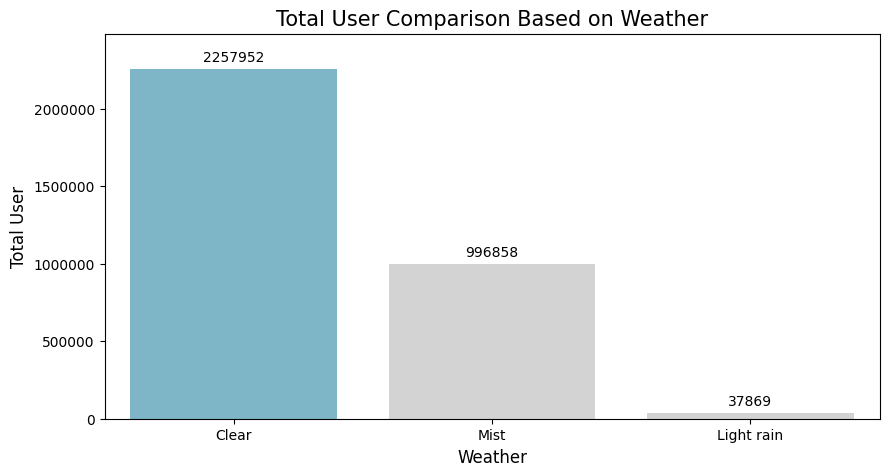

In [29]:
# Mendefinisikan dan membuat kerangka data yang akan kita tampilkan untuk menjawab pertanyaan
by_weather_df = day_rental_df.groupby('weather').agg({
    'total_user' : "sum"
}).reset_index()

# Mengurutkan data berdasarkan total_user secara descending
by_weather_df = by_weather_df.sort_values(by="total_user", ascending=False)

# Membuat plot dengan ukuran 10 x 5
plt.figure(figsize=(10, 5))

# Mendefinisikan color palette yang akan digunakan pada plot
colors_ = ["#72BCD4","#D3D3D3", "#D3D3D3"]

# Visualisasi menggunakan Bar Plot
sns.barplot(
    y="total_user", 
    x="weather",
    data=by_weather_df,
    palette=colors_
)

# Menampilkan angka di atas batang untuk memperjelas visualisasi
for i, v in enumerate(by_weather_df["total_user"]):
    plt.text(i, v + 50000, str(v), ha='center', fontsize=10)

# Styling agar diagram tidak terlalu rapat di bagian border atas
plt.ylim(0, by_weather_df["total_user"].max() * 1.1) 

# Menambahkan label dan judul
plt.title("Total User Comparison Based on Weather", fontsize=15)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Total User", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

# Menampilkan plot
plt.show()

**Insight:**
Total pengguna yang merental sepeda ketika cuaca sedang cerah jauh lebih tinggi dibandingkan dengan ketika cuaca sedang berkabut dan hujan ringan. Ketika hujan ringan, jarang ada pengguna/ orang yang merental sepeda. **Maka dari itu dapat disimpulkan bahwa cuaca sangat berpengaruh terhadap keinginan orang untuk bersepeda dengan merental sepeda, orang/ pengguna akan cenderung memilih bersepeda ketika cuaca lebih cerah**

### Pertanyaan 2: Berapa perbandingan persentase pengguna yang telah membuat akun pada Capital Bikeshare system antara tahun 2011 dan tahun 2012 di Washington D.C., USA ?

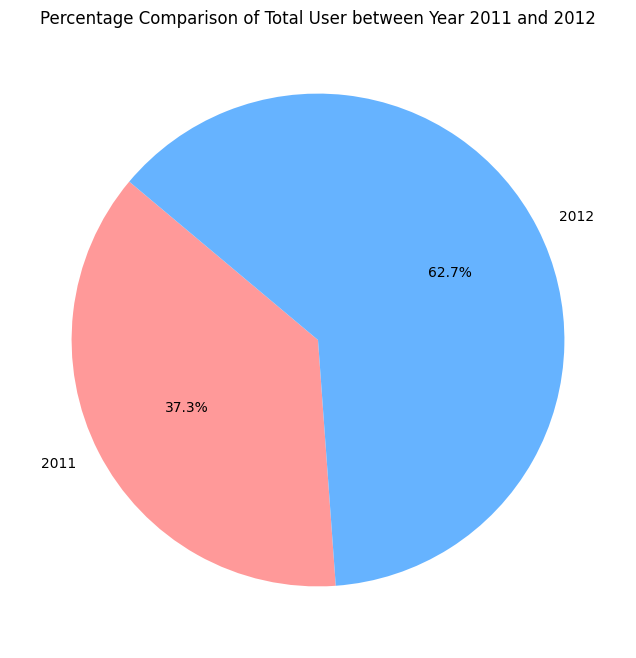

In [30]:
# Mendefinisikan dan membuat kerangka data yang akan kita tampilkan untuk menjawab pertanyaan
by_year_df= day_rental_df.groupby('year').agg({
    'registered' : "sum"
})

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    by_year_df['registered'], 
    labels=by_year_df.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
)

# Menambahkan label dan judul
plt.title("Percentage Comparison of Total User between Year 2011 and 2012")

# Menampilkan pie chart
plt.show()

**Insight:**
Jumlah pengguna terdaftar pada **tahun 2012 meningkat sebanyak 68% dari tahun 2011** dengan **persentase perbandingan jumlahnya adalah 62% berbanding dengan 37% dari keseluruhan total pengguna terdaftar selama 2 tahun tersebut**.

### Pertanyaan 3: Di bulan apa saja penggunaan rental sepeda pada Capital Bikeshare system dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA cenderung ramai ?

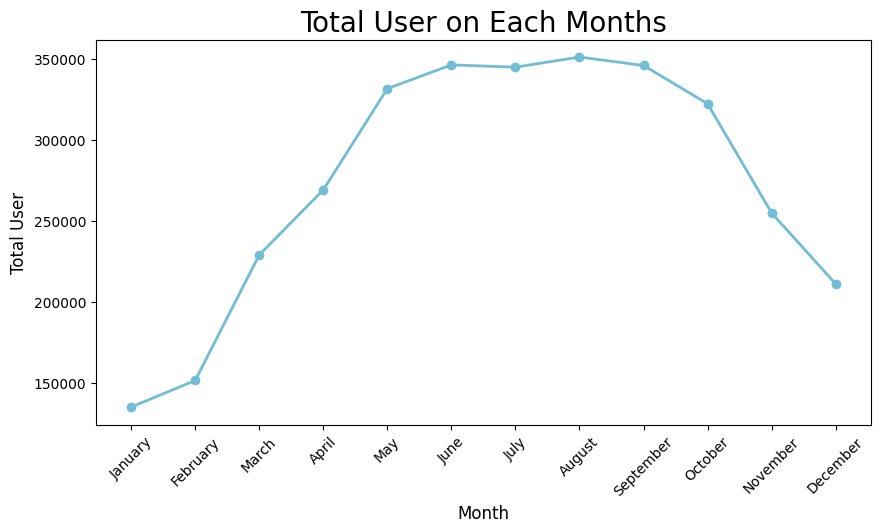

In [31]:
# Mendefinisikan dan membuat kerangka data yang akan kita tampilkan untuk menjawab pertanyaan
by_month_df = day_rental_df.groupby('month').agg({
    'total_user' : "sum"
}).reset_index()

# Mengurutkan data berdasarkan urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
by_month_df['month'] = pd.Categorical(by_month_df['month'], categories=month_order, ordered=True)
by_month_df = by_month_df.sort_values('month')

# Membuat plot dengan ukuran 10 x 5
plt.figure(figsize=(10, 5))

# Visualisasi menggunakan Line Plot
plt.plot(
    by_month_df['month'],
    by_month_df['total_user'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total User on Each Months", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total User", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.show()

**Insight:**
Terlihat pada grafik bahwa pada pertengahan bulan trafik dari pengguna yang merental sepeda cukup tinggi. Grafik yang ditampilkan cukup menarik karena pada bulan Januari hingga April jumlah perental sepeda rendah namun kemudian beranjak naik dan stabil hingga bulan Oktober, selanjutnya pada bulan November jumlah pengguna yang merental sepeda kembali turun jumlahnya. **Jadi dari grafik dapat ditarik kesimpulan, bahwa pengguna sepeda banyak merental sepeda pada bulan Mei hingga Oktober** karena pada grafik terlihat di Bulan oktober terjadi penurunan minat pengguna untuk merental sepeda kembali setelah sebelumnya rendah di Bulan April

### Pertanyaan 4: Pada jam berapa saja di setiap harinya penggunaan rental sepeda pada Capital Bikeshare system dalam rentang tahun 2011 hingga 2012 di Washington D.C., USA cenderung ramai ?

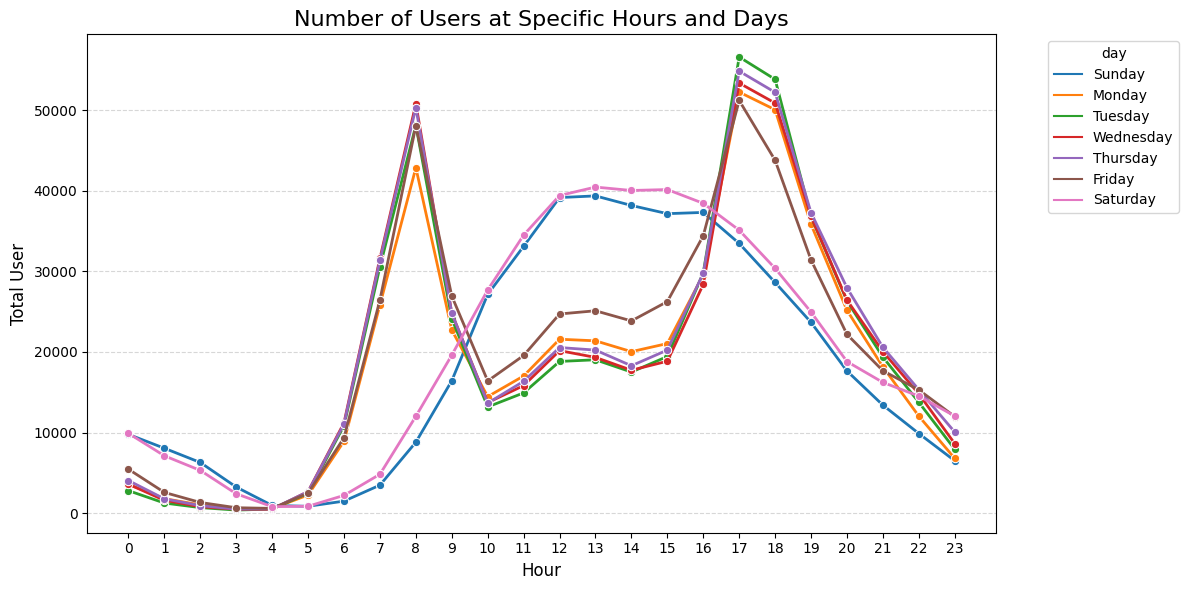

In [32]:
"""Mendefinisikan dan membuat kerangka data yang akan kita tampilkan untuk menjawab pertanyaan dengan 
mengelompokkan data berdasarkan hour dan day"""
by_hour_day_df = hour_rental_df.groupby(['hour', 'day']).agg({
    'total_user': 'sum'
}).reset_index()

# Membuat plot dengan ukuran 12 x 6
plt.figure(figsize=(12, 6))

# Mengurutkan hari agar tampilan visualisasi lebih mudah dipahami nantinya
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
by_hour_day_df['day'] = pd.Categorical(by_hour_day_df['day'], categories=day_order, ordered=True)
by_hour_day_df = by_hour_day_df.sort_values('day')

# Mengurutkan DataFrame berdasarkan hari
by_hour_day_df = by_hour_day_df.sort_values('day')

# Membuat visualisasi menggunakan Line Plot
sns.lineplot(
    x='hour',
    y='total_user',
    hue='day', 
    data=by_hour_day_df,
    marker='o',
    linewidth=2
)

# Menambahkan judul dan label
plt.title("Number of Users at Specific Hours and Days", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Total User", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Membuat keterangan untuk memperjelas
plt.legend(title='day', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
Secara mudah dapat kita ketahui bahwa terdapat **2 garis besar kesimpulan dari grafik yang ditampilkan**. Pada **hari Sabtu dan Minggu**, pengguna banyak merental sepeda **di sekitar jam 12 hingga 16**. Sementara itu **di hari lainnya** puncak (peak) dari perentalan sepeda berada di **sekitar jam 7 hingga 8 kemudian juga di jam 17 hingga 18**.

## Analisis Lanjutan (Clustering)

In [33]:
"""Melakukan clustering sederhana yaitu mengelompokan data waktu yang ada pada dataframe hour berdasarkan
cuaca"""
hour_rental_df.groupby("weather").agg({
    'date' : 'count'
})

,date
weather,
Clear,11413
Heavy rain,3
Light rain,1419
Mist,4544


**Insight:**
Data pada dataframe hour dapat kita cluster atau kelompokkan ke dalam 4 bagian besar yaitu dengan parameter cuaca sebagai dasar pengelompokan (terdapat clear, heavy rain, light rain dan juga mist). **Dari total 17.379 jam data yang ada pada dataframe, dapat disimpulkan melalui clustering bahwa 11.413 jam dalam 2 tahun (2011-2012) didominasi oleh cuaca yang cerah.**

## Conclusion

- Conclusion pertanyaan 1 : **Cuaca sangat berpengaruh terhadap keinginan orang untuk bersepeda dengan merental sepeda, orang/ pengguna akan cenderung memilih bersepeda ketika cuaca lebih cerah**
- Conclusion pertanyaan 2 : **Persentase perbandingan jumlah pengguna terdaftar pada tahun 2011 dibanding tahun 2012 adalah 62% berbanding dengan 37% dari keseluruhan total pengguna terdaftar selama 2 tahun tersebut**
- Conclusion pertanyaan 3 : **Pengguna sepeda paling banyak merental sepeda pada bulan Mei hingga Oktober**
- Conclusion pernyataan 4 : **Pada hari Sabtu dan Minggu, pengguna banyak merental sepeda di sekitar jam 12 hingga 16. Sementara itu di hari lainnya puncak (peak) dari perentalan sepeda berada di sekitar jam 7 hingga 8 kemudian juga di jam 17 hingga 18**.

**Keseluruhan Insight:**
Baik dari dataframe day maupun hour dapat kita lihat dan simpulkan bahwa pengguna sepeda cenderung merental sepeda pada rentang waktu tertentu (hal ini tentunya menyangkut jam padat (peak) yang telah dianalisis sebelumnya dan juga bulan yang ramai pengguna), selain dari waktu ternyata musim juga mempengaruhi minat pengguna dalam merental sepeda. Dari tahun 2011 ke tahun 2012, jumlah perental sepeda yang teregistrasi semakin banyak. Hal ini menandakan bahwa minat pengguna rental sepeda dari tahun pertama ke tahun kedua meningkat.

**Eksport dataframe yang telah diolah ke csv**

In [34]:
day_rental_df.to_csv("day.csv", index=False)
hour_rental_df.to_csv("hour.csv", index=False)

In [35]:
FileLink("day.csv")

/kaggle/working/day.csv

In [36]:
FileLink("hour.csv")

/kaggle/working/hour.csv